In [1]:
import pandas as pd
import numpy as np
from scipy.sparse import csr_matrix
from sklearn.neighbors import NearestNeighbors
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
#Reading the dataframe
df = pd.read_csv("reddit_data.csv")

In [52]:
df

,username,subreddit
0,kabanossi,photoshopbattles
1,kabanossi,GetMotivated
2,kabanossi,vmware
3,kabanossi,carporn
4,kabanossi,DIY
...,...,...
13999995,RushNY,iOSthemes
13999996,RushNY,iOSthemes
13999997,RushNY,cars
13999998,RushNY,Toyota


In [3]:
df.head()

,username,subreddit,utc
0,kabanossi,photoshopbattles,1.482748e+09
1,kabanossi,GetMotivated,1.482748e+09
2,kabanossi,vmware,1.482748e+09
3,kabanossi,carporn,1.482748e+09
4,kabanossi,DIY,1.482747e+09


In [4]:
df.tail()

,username,subreddit,utc
13999995,RushNY,iOSthemes,1.405371e+09
13999996,RushNY,iOSthemes,1.404528e+09
13999997,RushNY,cars,1.404230e+09
13999998,RushNY,Toyota,1.404143e+09
13999999,RushNY,jailbreak,1.404095e+09


In [5]:
df.sample(5)

,username,subreddit,utc
8802602,sfcnmone,keto,1.479433e+09
10696534,GeraldVanHeer,AdviceAnimals,1.425034e+09
2833793,boxed_lunch_venom,AskReddit,1.472270e+09
10500118,ErzaKnightwalk,Amd,1.481872e+09
9826264,Onikame,starcitizen,1.475359e+09


In [6]:
df.shape

(14000000, 3)

In [7]:
df.size

42000000

In [8]:
df.ndim

2

In [9]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 14000000 entries, 0 to 13999999
Data columns (total 3 columns):
 #   Column     Dtype  
---  ------     -----  
 0   username   object 
 1   subreddit  object 
 2   utc        float64
dtypes: float64(1), object(2)
memory usage: 320.4+ MB


In [10]:
df.describe()

,utc
count,1.400000e+07
mean,1.466360e+09
std,2.489116e+07
min,1.152578e+09
25%,1.463470e+09
50%,1.475936e+09
75%,1.480630e+09
max,1.483188e+09


In [17]:
df.isna().sample(5)

,username,subreddit,utc
5516931,False,False,False
1891128,False,False,False
11533075,False,False,False
3310519,False,False,False
3026269,False,False,False


In [13]:
df.isna().sum()

username     0
subreddit    0
utc          0
dtype: int64

In [14]:
df.columns

Index(['username', 'subreddit', 'utc'], dtype='object')

In [20]:
#Drop datetime column
df.drop(['utc'], inplace=True, axis=1)

#Finding number of usernames and subreddits
users = df.username.unique().tolist()
subs = df.subreddit.unique().tolist()
print('Number of Usernames: {}'.format(len(users)))
print('Number of Subreddits: {}'.format(len(subs)))

Number of Usernames: 22610
Number of Subreddits: 34967


In [21]:
df

,username,subreddit
0,kabanossi,photoshopbattles
1,kabanossi,GetMotivated
2,kabanossi,vmware
3,kabanossi,carporn
4,kabanossi,DIY
...,...,...
13999995,RushNY,iOSthemes
13999996,RushNY,iOSthemes
13999997,RushNY,cars
13999998,RushNY,Toyota


In [22]:
#Finding each user's total number of comments for each subreddit
dftot = df.groupby(['username','subreddit']).size().reset_index(name="tot_comments")

#Finding each user's max number of comments for all subreddits
dfmax = dftot.groupby(['username'])['tot_comments'].max().reset_index(name="max_comments")

#Merging total and max comments onto new dataframe
dfnew = pd.merge(dftot, dfmax, on='username', how='left')

#Calculate a user's subreddit rating based on total and max comments
dfnew['rating'] = dfnew['tot_comments']/dfnew['max_comments']*10

In [23]:
dftot

,username,subreddit,tot_comments
0,--ANUSTART-,AOImmortals,2
1,--ANUSTART-,Addons4Kodi,1
2,--ANUSTART-,AdviceAnimals,7
3,--ANUSTART-,AskReddit,14
4,--ANUSTART-,Assistance,9
...,...,...,...
892457,zzy_,summonerschool,170
892458,zzy_,symphonicmetal,5
892459,zzy_,tifu,2
892460,zzy_,todayilearned,8


In [24]:
dfmax

,username,max_comments
0,--ANUSTART-,117
1,--Sko--,297
2,--UNKN0WN--,479
3,--harley--quinn--,107
4,-A-p-r-i-l-,9
...,...,...
22605,zwingo,596
22606,zy12470,132
22607,zzjm,3
22608,zzvilzz,26


In [25]:
dfnew

,username,subreddit,tot_comments,max_comments,rating
0,--ANUSTART-,AOImmortals,2,117,0.170940
1,--ANUSTART-,Addons4Kodi,1,117,0.085470
2,--ANUSTART-,AdviceAnimals,7,117,0.598291
3,--ANUSTART-,AskReddit,14,117,1.196581
4,--ANUSTART-,Assistance,9,117,0.769231
...,...,...,...,...,...
892457,zzy_,summonerschool,170,396,4.292929
892458,zzy_,symphonicmetal,5,396,0.126263
892459,zzy_,tifu,2,396,0.050505
892460,zzy_,todayilearned,8,396,0.202020


In [26]:
#Create new dataframe and drop duplicate users
dfusers = df.drop_duplicates(subset='username')
#Drop subs
dfusers.drop(['subreddit'], inplace=True, axis=1)
#Sort by users
dfusers = dfusers.sort_values(['username'], ascending=True)
#Reset index
dfusers.reset_index(drop=True, inplace=True)
#Create user id from index
dfusers['user_id'] = dfusers.index+1

#Create new dataframe and drop duplicate subs
dfsubs = df.drop_duplicates(subset='subreddit')
#Drop users
dfsubs.drop(['username'], inplace=True, axis=1)
#Sort by subs
dfsubs = dfsubs.sort_values(['subreddit'], ascending=True)
#Reset index
dfsubs.reset_index(drop=True, inplace=True)
#Create user id from index
dfsubs['sub_id'] = dfsubs.index+1

#Merging user id onto dataframe, moving position
dfnew = pd.merge(dfnew, dfusers, on='username', how='left')
move_pos = dfnew.pop('user_id')
dfnew.insert(1, 'user_id', move_pos)
#Merging sub id onto dataframe, moving position
dfnew = pd.merge(dfnew, dfsubs, on='subreddit', how='left')
move_pos = dfnew.pop('sub_id')
dfnew.insert(3, 'sub_id', move_pos)

C:\Users\aryan\AppData\Local\Temp\ipykernel_23776\321668290.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dfusers.drop(['subreddit'], inplace=True, axis=1)
C:\Users\aryan\AppData\Local\Temp\ipykernel_23776\321668290.py:15: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dfsubs.drop(['username'], inplace=True, axis=1)


In [27]:
dfusers

,username,user_id
0,--ANUSTART-,1
1,--Sko--,2
2,--UNKN0WN--,3
3,--harley--quinn--,4
4,-A-p-r-i-l-,5
...,...,...
22605,zwingo,22606
22606,zy12470,22607
22607,zzjm,22608
22608,zzvilzz,22609


In [29]:
dfsubs

,subreddit,sub_id
0,007,1
1,065_082_071,2
2,0ad,3
3,0x10c,4
4,0x3642,5
...,...,...
34962,zweiteliga,34963
34963,zxspectrum,34964
34964,zyramains,34965
34965,zyzz,34966


In [30]:
dfnew

,username,user_id,subreddit,sub_id,tot_comments,max_comments,rating
0,--ANUSTART-,1,AOImmortals,413,2,117,0.170940
1,--ANUSTART-,1,Addons4Kodi,569,1,117,0.085470
2,--ANUSTART-,1,AdviceAnimals,609,7,117,0.598291
3,--ANUSTART-,1,AskReddit,1403,14,117,1.196581
4,--ANUSTART-,1,Assistance,1461,9,117,0.769231
...,...,...,...,...,...,...,...
892457,zzy_,22610,summonerschool,32434,170,396,4.292929
892458,zzy_,22610,symphonicmetal,32573,5,396,0.126263
892459,zzy_,22610,tifu,33187,2,396,0.050505
892460,zzy_,22610,todayilearned,33272,8,396,0.202020


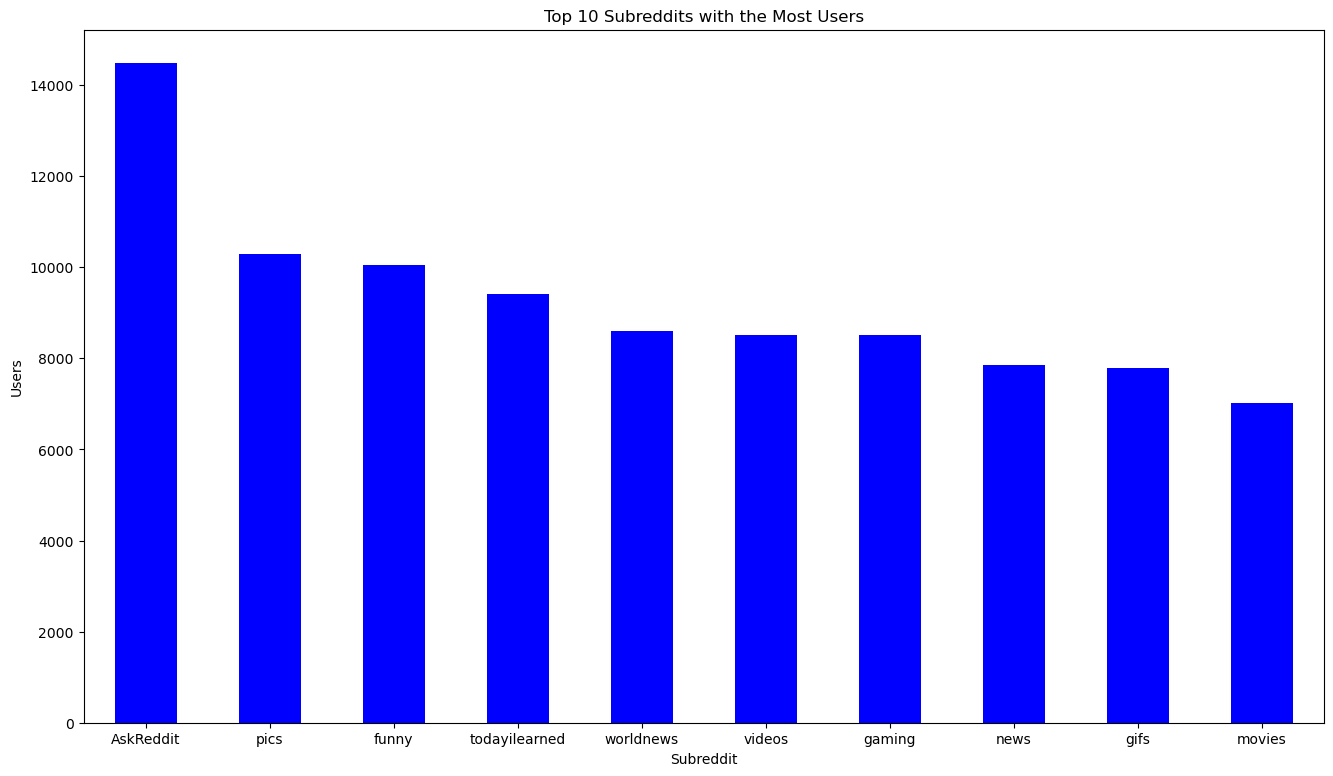

In [33]:
#Counting number of users in each subreddit
dfcounts = dfnew['subreddit'].value_counts().rename_axis('subreddit').reset_index(name='tot_users').head(10)

#Plotting the Top 10 Subreddits with the Most Users
plt.rcParams["figure.figsize"] = (16,9)
dfcounts.plot.bar(x='subreddit', y='tot_users', rot=0, legend=None, color=['blue'])
plt.gcf().axes[0].yaxis.get_major_formatter().set_scientific(False)
plt.title('Top 10 Subreddits with the Most Users')
plt.xlabel('Subreddit')
plt.ylabel('Users')
plt.show()

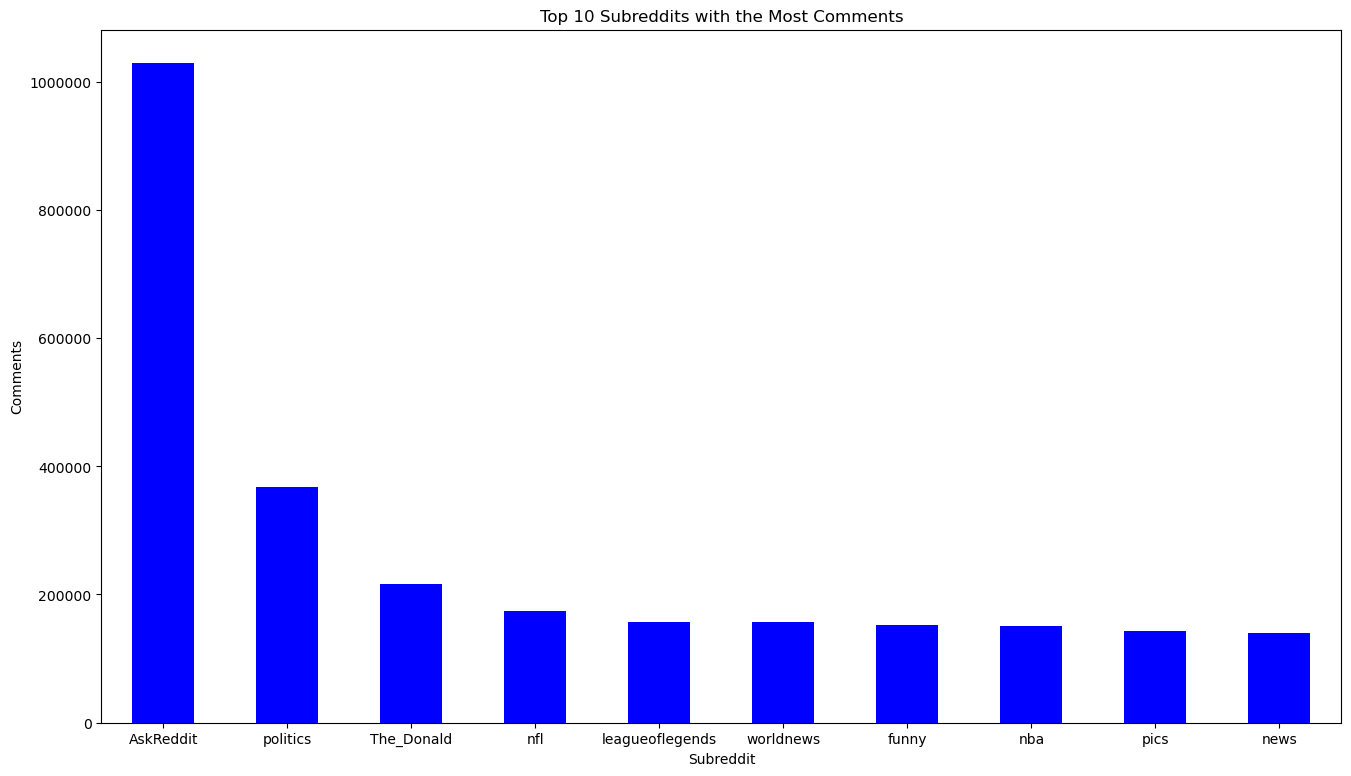

In [37]:
#Grouping by subreddit, summing by top 10 total comments
dfsum = dfnew.groupby(['subreddit']).sum()
dfsum = dfsum[['tot_comments']].sort_values(by='tot_comments', ascending=False).head(10)

#Plotting the Top 10 Subreddits with the Most Comments
plt.rcParams["figure.figsize"] = (16,9)
dfsum.plot.bar(y='tot_comments', rot=0, legend=None, color=['blue'])
plt.gcf().axes[0].yaxis.get_major_formatter().set_scientific(False)
plt.title('Top 10 Subreddits with the Most Comments')
plt.xlabel('Subreddit')
plt.ylabel('Comments')
plt.show()

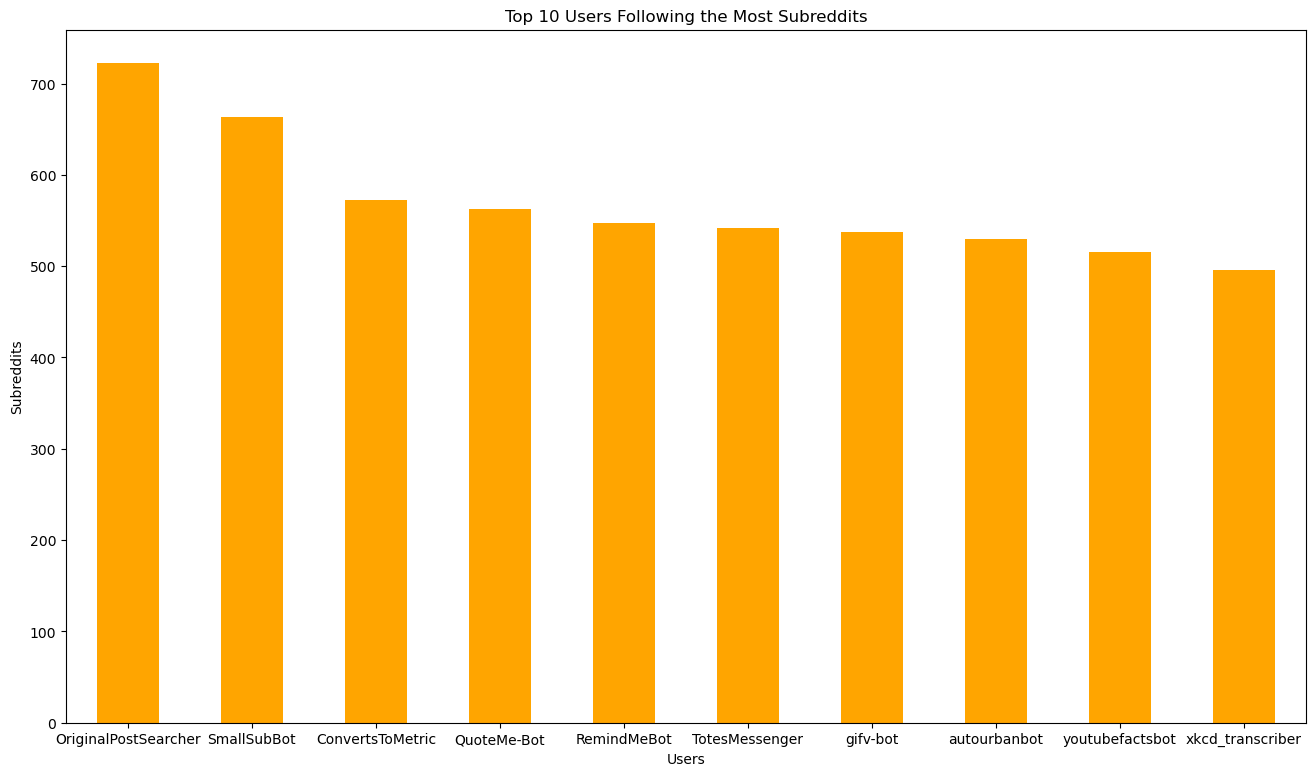

In [36]:
#Counting number of subreddits each user follows
dfcounts = dfnew['username'].value_counts().rename_axis('username').reset_index(name='tot_subs').head(10)

#Plotting the Top 10 Users following the most subreddits
plt.rcParams["figure.figsize"] = (16,9)
dfcounts.plot.bar(x='username', y='tot_subs', rot=0, legend=None, color=['orange'])
plt.gcf().axes[0].yaxis.get_major_formatter().set_scientific(False)
plt.title('Top 10 Users Following the Most Subreddits')
plt.xlabel('Users')
plt.ylabel('Subreddits')
plt.show()

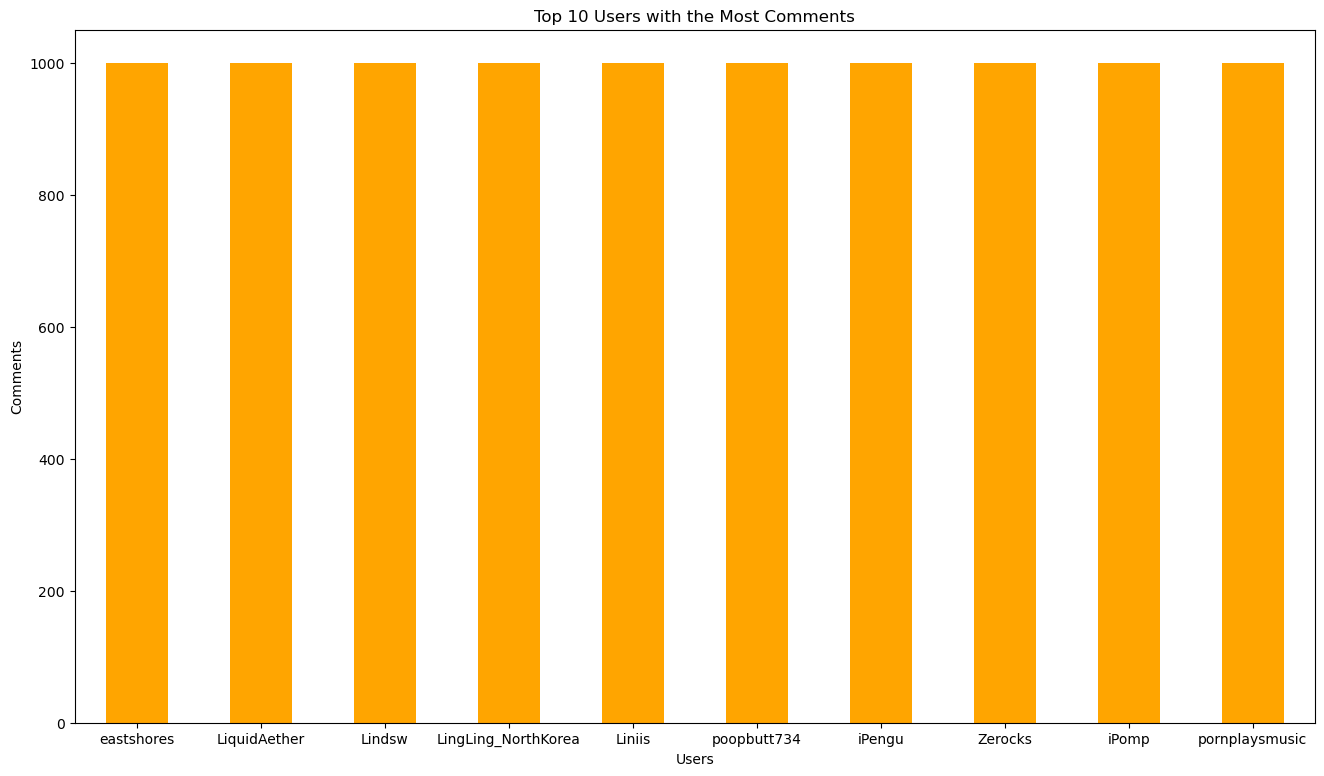

In [38]:
#Grouping by subreddit, summing by top 10 total comments
dfsum = dfnew.groupby(['username']).sum()
dfsum = dfsum[['tot_comments']].sort_values(by='tot_comments', ascending=False).head(10)

#Plotting the Top 10 Users with the Most Comments
plt.rcParams["figure.figsize"] = (16,9)
dfsum.plot.bar(y='tot_comments', rot=0, legend=None, color=['orange'])
plt.gcf().axes[0].yaxis.get_major_formatter().set_scientific(False)
plt.title('Top 10 Users with the Most Comments')
plt.xlabel('Users')
plt.ylabel('Comments')
plt.show()

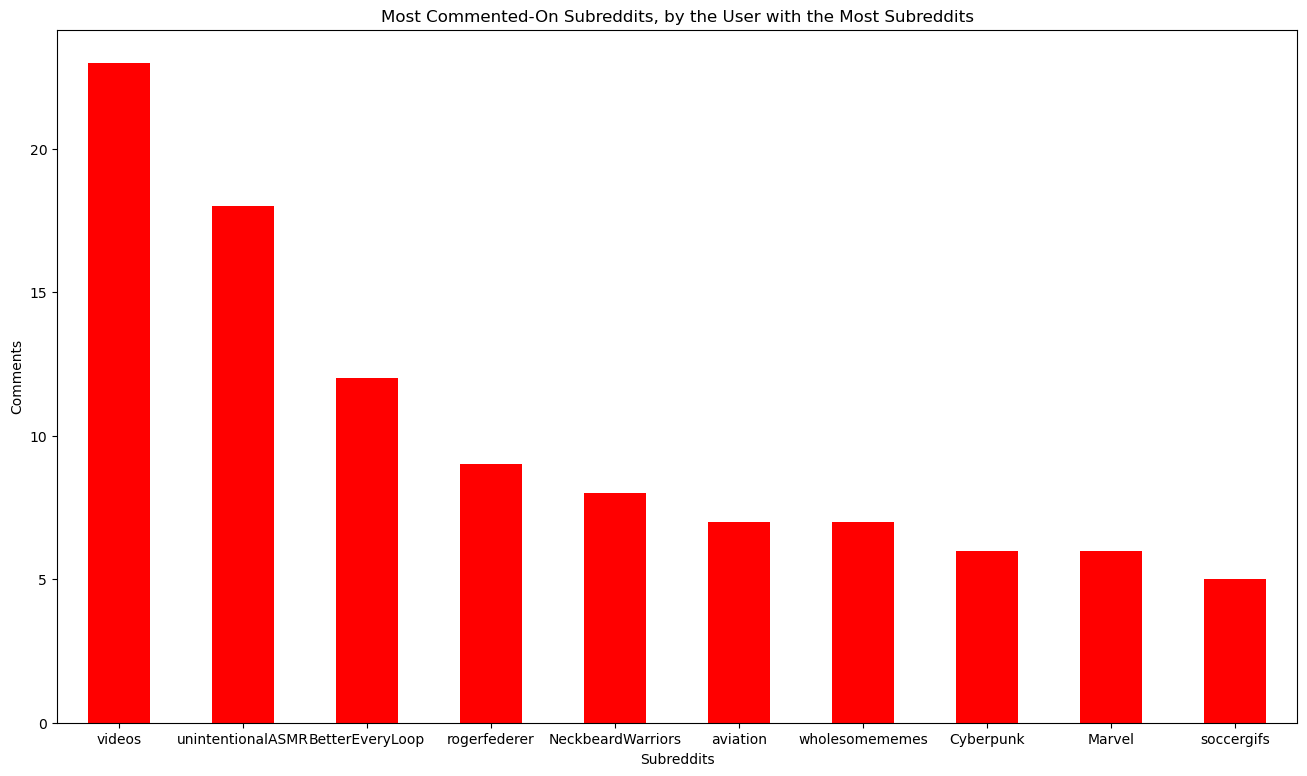

In [39]:
dftop = dfnew[dfnew.username.str.contains('OriginalPostSearcher')]
dftop = dftop.sort_values(by='tot_comments', ascending=False).head(10)

#Plotting the top 10 fav subs of the user who follows the most subs
plt.rcParams["figure.figsize"] = (16,9)
dftop.plot.bar(x='subreddit', y='tot_comments', rot=0, legend=None, color=['red'])
plt.gcf().axes[0].yaxis.get_major_formatter().set_scientific(False)
plt.title('Most Commented-On Subreddits, by the User with the Most Subreddits')
plt.xlabel('Subreddits')
plt.ylabel('Comments')
plt.show()

In [41]:
#Create new dataframe
dfnum = dfnew

#Drop non-numerical columns
dfnew.drop(['username','subreddit','tot_comments','max_comments'], inplace=True, axis=1)

#Pivot dataframe into a matrix of total ratings for users and subs
dfrat = dfnum.pivot(index='sub_id', columns='user_id', values='rating')

#Replace all null values with 0
dfrat.fillna(0,inplace=True)

In [42]:
dfnum

,user_id,sub_id,rating
0,1,413,0.170940
1,1,569,0.085470
2,1,609,0.598291
3,1,1403,1.196581
4,1,1461,0.769231
...,...,...,...
892457,22610,32434,4.292929
892458,22610,32573,0.126263
892459,22610,33187,0.050505
892460,22610,33272,0.202020


In [43]:
dfrat

user_id,1,2,3,4,5,6,7,8,9,10,...,22601,22602,22603,22604,22605,22606,22607,22608,22609,22610
sub_id,,,,,,,,,,,,,,,,,,,,,
1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
5,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
34963,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
34964,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
34965,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [44]:
#Calculating number of users commenting per sub
num_users = dfnum.groupby('sub_id')['rating'].agg('count')

#Calculating number of subs per user
num_subs = dfnum.groupby('user_id')['rating'].agg('count')

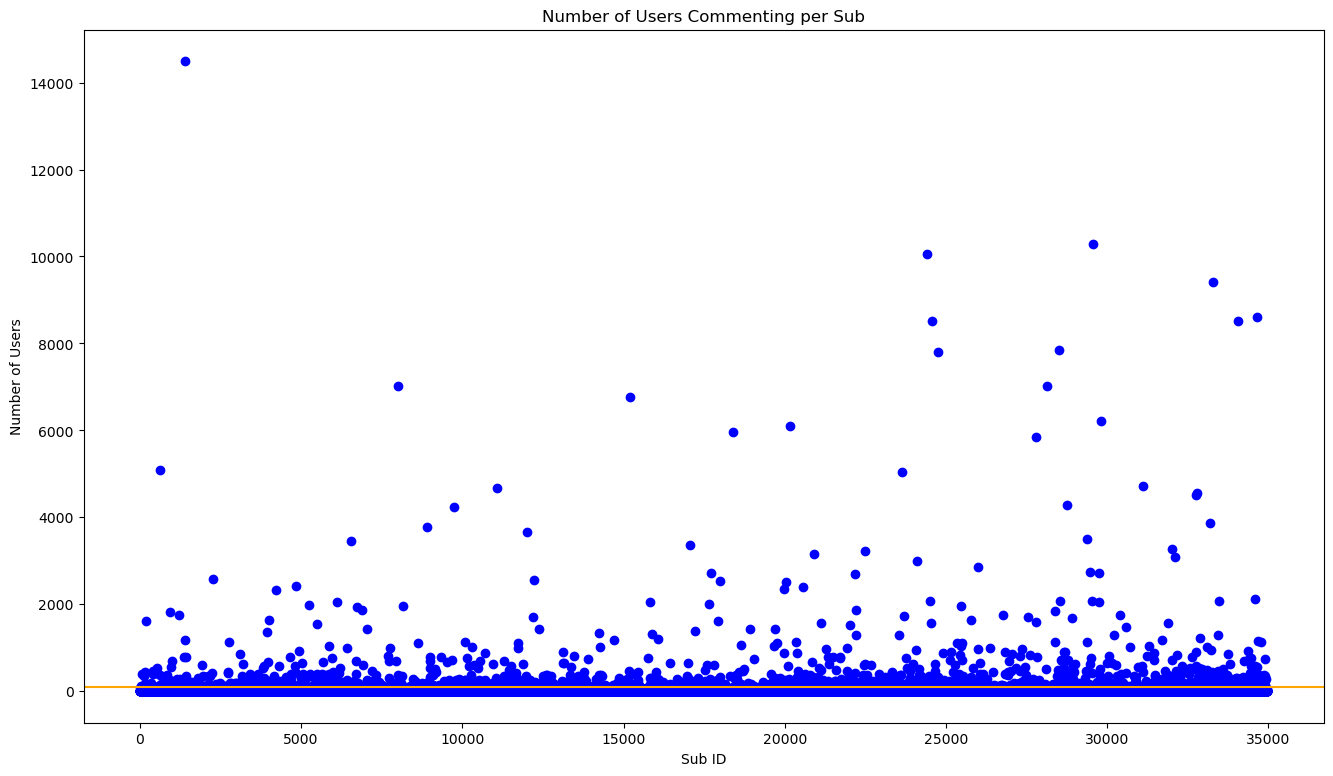

In [45]:
#Plotting number of users commenting per sub
#Drawing a line of minimum users commenting: 100
f,ax = plt.subplots(1,1,figsize=(16,9))
plt.scatter(num_users.index,num_users,color='blue')
plt.axhline(y=100,color='orange')
plt.title('Number of Users Commenting per Sub')
plt.xlabel('Sub ID')
plt.ylabel('Number of Users')
plt.show()

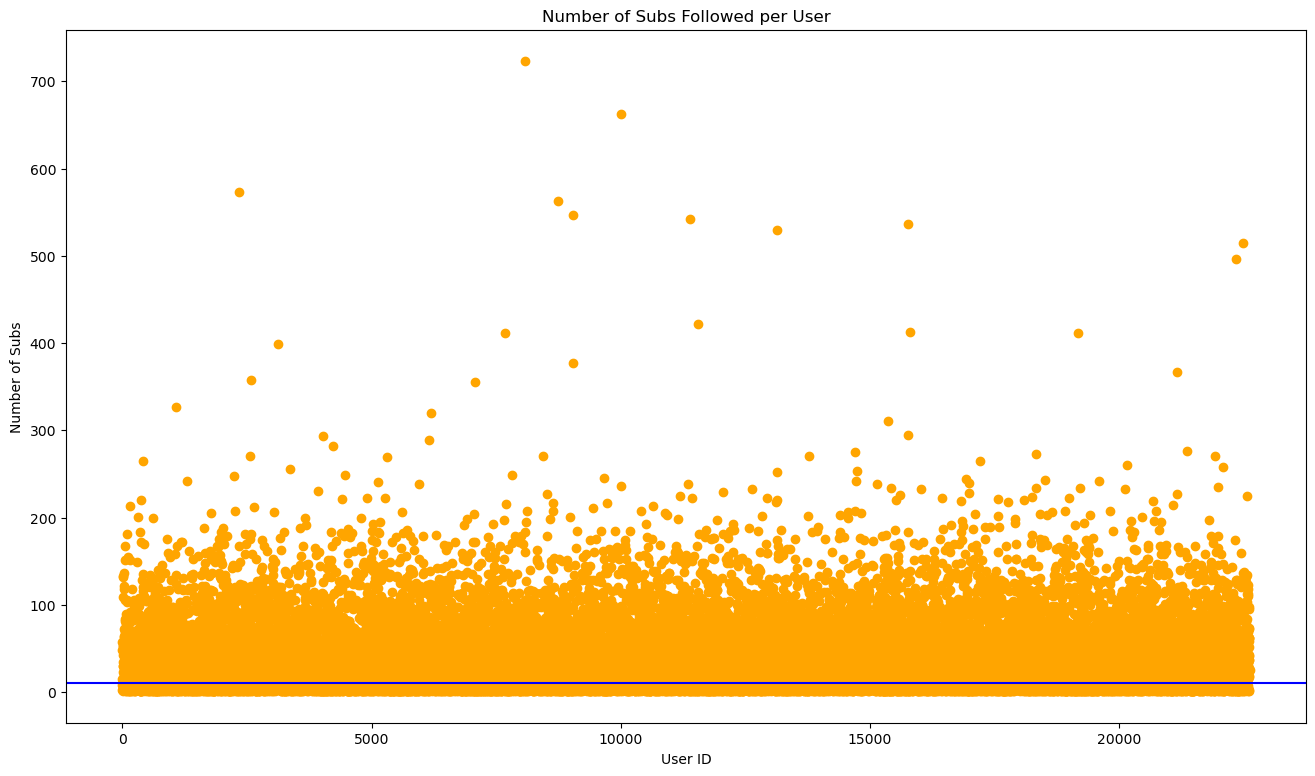

In [46]:
#Plotting number of subs followed per user
#Drawing a line of minimum subs following: 10
f,ax = plt.subplots(1,1,figsize=(16,9))
plt.scatter(num_subs.index,num_subs,color='orange')
plt.axhline(y=10,color='blue')
plt.title('Number of Subs Followed per User')
plt.xlabel('User ID')
plt.ylabel('Number of Subs')
plt.show()

In [47]:
#Limiting dataframe to only subreddits with 100 or more commenting users
dflast = dfrat.loc[num_users[num_users > 100].index,:]

#Limiting dataframe to only users following 10 or more subs
dflast = dflast.loc[:,num_subs[num_subs > 10].index]

#Removing sparsity from the ratings dataset
csr_data = csr_matrix(dflast.values)
dflast.reset_index(inplace=True)

In [48]:
dflast

user_id,sub_id,1,2,4,6,7,9,10,12,14,...,22599,22600,22601,22602,22603,22604,22605,22606,22607,22610
0,26,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,63,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,112,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,143,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,152,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1259,34883,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1260,34885,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.111732,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1261,34891,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,...,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1262,34905,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [49]:
#Using K-Nearest Neighbors as a similarity metric with cosine simlarity
knn = NearestNeighbors(metric='cosine', algorithm='brute', n_neighbors=20, n_jobs=-1)
knn.fit(csr_data)

#Defining subreddit receommender function
def subreddit_recommender(sub_name):
    num_subs_to_reccomend = 10
    sub_list = dfsubs[dfsubs['subreddit'].str.contains(sub_name)]  
    if len(sub_list):        
        sub_idx = sub_list.iloc[0]['sub_id']
        sub_idx = dflast[dflast['sub_id'] == sub_idx].index[0]
        distances , indices = knn.kneighbors(csr_data[sub_idx],n_neighbors=num_subs_to_reccomend+1)    
        rec_sub_indices = sorted(list(zip(indices.squeeze().tolist(),distances.squeeze().tolist())),key=lambda x: x[1])[:0:-1]
        recommend_frame = []
        for val in rec_sub_indices:
            sub_idx = dflast.iloc[val[0]]['sub_id']
            idx = dfsubs[dfsubs['sub_id'] == sub_idx].index
            recommend_frame.append({'Subreddit':dfsubs.iloc[idx]['subreddit'].values[0],'Distance':val[1]})
        df = pd.DataFrame(recommend_frame,index=range(1,num_subs_to_reccomend+1))
        return df
    else:
        return "No subreddits found. Please check your input"

In [50]:
subreddit_recommender("AskReddit")

,Subreddit,Distance
1,AdviceAnimals,0.673353
2,gaming,0.666374
3,mildlyinteresting,0.661056
4,videos,0.639773
5,IAmA,0.637419
6,gifs,0.626443
7,Showerthoughts,0.596253
8,todayilearned,0.554709
9,funny,0.537416
10,pics,0.517912


In [51]:
subreddit_recommender("leagueoflegends")

,Subreddit,Distance
1,pics,0.942052
2,diablo3,0.939190
3,Overwatch,0.934693
4,wow,0.932884
5,anime,0.932883
6,videos,0.921334
7,gaming,0.918752
8,AskReddit,0.910547
9,hearthstone,0.884681
10,summonerschool,0.700251


In [59]:
subreddit_recommender("gaming")

IndexError: index 0 is out of bounds for axis 0 with size 0